# Manav Gupta

## Research question/interests

In this project, I aim to find out any trends based on gender, race , city or age of the person in the US Police Shooting that have taken place from 2015-2022. I believe that analysing this data could help us understand if any reforms are needed in the United States. My main focus would be analysing the gender, race and location of the victims.

Depending on the results, I would further analyse the manner of death, if there were signs if any mental illness and the presence of body cameras on the police. 


![US MAP](1920px-Police_killings_in_the_USA_in_2018.svg.png)


# Task 1 : Exploratory Data Analysis (EDA) 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
raw_data = pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
raw_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

As we can see, there are hardly any null values in the dataset which shows that the data collected is complete and reliable however, in some cases we can observe that few of the values are null. This causes uncertainty and we will analyse data with null values separately. 

In [ ]:
raw_data.shape

(7729, 17)

The dataset has **7729 entries from 2015-2022.** This is very helpful since more entries gives a greater chance of creating trends that are more reliable and accurate. These entries would give a wide range of data which could be used to analyse the trends and provide answers to our research questions. 



In [ ]:
raw_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

Here as we can see that, there are various different columns present in the dataset however, not only columns would be needed to analyse the data. Columns  like **'longitiude', 'latitude', 'is_geocoding_exact'** do not provide us with much value therefore, we can probably remove them from the dataset. 

In [ ]:
raw_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


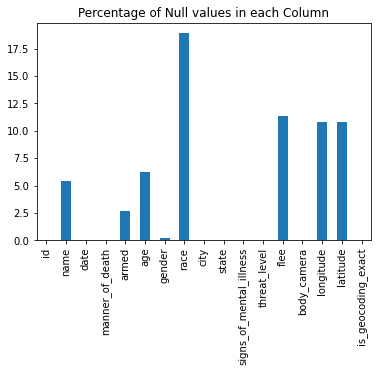

In [ ]:
import matplotlib.pyplot as plt
null = df.isnull().sum()/df.shape[0]*100
null.plot(kind='bar')
plt.title("Percentage of Null values in each Column")
plt.show()

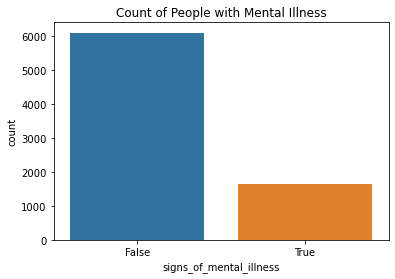

In [ ]:
import seaborn as sns
sns.countplot(data=df,x='signs_of_mental_illness')
plt.title("Count of People with Mental Illness")
plt.show()

# Task 2: Data Analysis Pipeline

First, I will clean the data. I will remove columns that would not help in the analysis such as id, longitiude, latitude and geocoding.

In [ ]:
clean_data = raw_data.drop(['id','longitude','latitude','is_geocoding_exact'], axis=1)
clean_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False
7725,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False
7726,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False
7727,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False


In [ ]:
shootings_data = clean_data.drop(['name'],axis=1)
shootings_data.head()


,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Here, I'm trying to focus on whether the victim was armed or not and if the police had no choice but to shoot the victim. 
Therefore, I will create a new column that will access the danger level of the victim. This would be based in regards to these specific columns (armed, threat_level, signs of mental illness)

In [ ]:
shootings_data.armed.value_counts()

gun                               4407
knife                             1108
unarmed                            456
undetermined                       313
vehicle                            276
                                  ... 
pen                                  1
chainsaw                             1
gun and sword                        1
claimed to be armed                  1
knife, hammer and gasoline can       1
Name: armed, Length: 104, dtype: int64

In [ ]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

Since there are so many various weapons that the victims possess, we will divide it into weather the victim was armed or not and even change the column name to 'armed/unarmed'.

In [ ]:

weapons_type = list(shootings_data['armed'].unique())

weapons_type.remove('unarmed')

def weapon(armed):
    if armed in weapons_type:
        return 'armed'
    else:
        return 'unarmed'
    
shootings_data['armed'] = shootings_data['armed'].apply(weapon)
shootings_data = shootings_data.rename(columns={'armed': 'armed/unarmed'})
shootings_data

,date,manner_of_death,armed/unarmed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,armed,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7724,2022-09-07,shot,armed,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False
7725,2022-09-07,shot,armed,NaN,M,W,Springville,AL,False,attack,Car,False
7726,2022-09-07,shot,armed,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False
7727,2022-09-07,shot,armed,27.0,M,NaN,Washington County,TN,False,attack,Other,False
